## **Izdiharti Noni Pertiwi**
pertiwi9@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-01 14:41:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  14.0MB/s    in 23s     

2021-07-01 14:41:47 (13.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os,shutil
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
ACCURACY_THRESHOLD = 0.97

# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.97
class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('acc') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

# Instantiate a callback object     
callbacks = myCallback()

In [5]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [7]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [8]:
# membuat direktori batu pada direktori data training
train_roc = os.path.join(train_dir, 'rock')
# membuat direktori kertas pada direktori data training
train_pap = os.path.join(train_dir, 'paper')
# membuat direktori gunting pada direktori data training
train_sci = os.path.join(train_dir, 'scissors')
# membuat direktori batu pada direktori data validasi
val_roc = os.path.join(validation_dir, 'rock')
# membuat direktori kertas pada direktori data validasi
val_pap = os.path.join(validation_dir, 'paper')
# membuat direktori gunting pada direktori data validasi
val_sci = os.path.join(validation_dir, 'scissors')

In [9]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [10]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [11]:
# memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [12]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

In [13]:
#augmentasi and generator image data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,# direktori data latih
    target_size=(150,150),# mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size= 32,# karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,# direktori data latih
    target_size = (150,150),# mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 32,# karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(3, activation= 'softmax')
])

In [16]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 86s - loss: 0.9118 - acc: 0.5572 - val_loss: 0.6121 - val_acc: 0.6863
Epoch 2/20
41/41 - 84s - loss: 0.3753 - acc: 0.8666 - val_loss: 0.2349 - val_acc: 0.9155
Epoch 3/20
41/41 - 84s - loss: 0.2189 - acc: 0.9261 - val_loss: 0.2020 - val_acc: 0.9410
Epoch 4/20
41/41 - 83s - loss: 0.1955 - acc: 0.9261 - val_loss: 0.2213 - val_acc: 0.9155
Epoch 5/20
41/41 - 84s - loss: 0.1213 - acc: 0.9581 - val_loss: 0.1770 - val_acc: 0.9479
Epoch 6/20
41/41 - 83s - loss: 0.0800 - acc: 0.9733 - val_loss: 0.1515 - val_acc: 0.9410

Reached 97.00% accuracy, so stopping training!!


Saving WhatsApp Image 2021-07-01 at 20.32.11.jpeg to WhatsApp Image 2021-07-01 at 20.32.11.jpeg
WhatsApp Image 2021-07-01 at 20.32.11.jpeg
rock


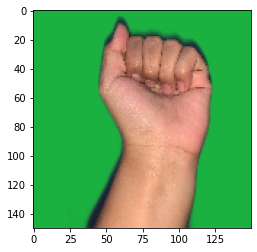

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')